# Proyek Analisis Data
- **Nama:** Asep Nadhirin
- **Email:** asepnadh@upi.edu
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

*   Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
*   Produk apa yang paling banyak dan paling sedikit terjual?



## Import Semua Packages/Library yang Digunakan

In [6]:
import numpy as np
import pandas as pd # Added import statement for pandas
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/customers.csv")
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [8]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/orders.csv")
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [9]:
product_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/products.csv")
product_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [10]:
sales_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/sales.csv")
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


### Assessing Data

customer

In [22]:
customers_df.info() #missing value pada coloum gender
customers_df.isna().sum() #ada 18 missing value pada coloum gender
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe() #memeriksa parameter statistik (Terdapat inaccurate value pada kolom age)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB
Jumlah duplikasi:  6


,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


order

In [20]:
orders_df.info() #kesalahan tipe data kolom order_date & delivery_date. harusnya direpresentasikan sebagai tipe data datetime
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB
Jumlah duplikasi:  0


,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


product

In [21]:
product_df.info()
print("Jumlah duplikasi: ", product_df.duplicated().sum())
product_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.2+ KB
Jumlah duplikasi:  6


,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


sales

In [23]:
sales_df.info() #missing value pada kolom total_price
sales_df.isna().sum() #19 missing value
print("Jumlah duplikasi: ", sales_df.duplicated().sum())
sales_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB
Jumlah duplikasi:  0


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


### Cleaning Data

customer

In [24]:
customers_df.drop_duplicates(inplace=True)
customers_df.dropna(subset=['gender'], inplace=True)
customers_df[customers_df.gender.isna()] #baris data yang mengandung missing value pada kolom gender
#masih mengandung banyak informasi penting, jadi pake metode imputation
customers_df.gender.value_counts() # mengidentifikasi nilai yang dominan (Prefer not to say)
customers_df.gender.fillna('Prefer not to say', inplace=True)
customers_df.isna().sum()
customers_df[customers_df.age == customers_df.age.max()] #melihat data baris data yang mengandung inaccurate value tersebut (baris dengan nilai age maksimum)
customers_df.age.replace(customers_df.age.max(), 70, inplace=True)
customers_df[customers_df.age == customers_df.age.max()]
customers_df.age.replace(customers_df.age.max(), 50, inplace=True) #gantilah dengan nilai 50
customers_df.describe()

,customer_id,age,zip_code
count,983.000000,983.000000,983.000000
mean,497.457782,49.894201,5014.220753
std,288.005668,17.655362,2880.848002
min,1.000000,20.000000,2.000000
25%,248.500000,34.000000,2422.500000
50%,497.000000,50.000000,5104.000000
75%,744.500000,65.000000,7466.500000
max,1000.000000,80.000000,9998.000000


order

In [26]:
datetime_columns = ["order_date", "delivery_date"] #Inisialisasi List datetime_columns

for column in datetime_columns: #loop for untuk iterasi melalui setiap elemen dalam list datetime_columns
  orders_df[column] = pd.to_datetime(orders_df[column]) #pd.to_datetime(orders_df[column]) mengonversi kolom yang saat ini sedang diiterasi (column) menjadi tipe data datetime. Fungsi pd.to_datetime() dari Pandas digunakan untuk melakukan konversi ini
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


product

In [ ]:
product_df.drop_duplicates(inplace=True) #menghapus semua data yang duplikat
print("Jumlah duplikasi: ", product_df.duplicated().sum())

sales

In [27]:
sales_df[sales_df.total_price.isna()] #melihat baris data yang mengandung missing value pada total_price
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"] #nilai total_price merupakan hasil perkalian antara price_per_unit dan quantity
sales_df.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

customer

In [28]:
customers_df.describe(include="all") #melihat rangkuman parameter statistik
customers_df.groupby(by="gender").agg({       #demografi pelanggan berdasarkan jenis kelamin (gender).
    "customer_id": "nunique",
    "age": ["max", "min", "mean", "std"]
})
customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False) #persebaran jumlah pelanggan berdasarkan kota (city)
customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False) #persebaran jumlah pelanggan berdasarkan kota (city)


city
East Sophia      3
East Aidan       3
New Ava          3
Lake Rose        2
West Jackfort    2
                ..
Jordanburgh      1
Jordanside       1
Josephland       1
Josephmouth      1
Zacville         1
Name: customer_id, Length: 944, dtype: int64

order & customer

In [29]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active") #“Active” untuk pelanggan yang pernah melakukan order
customers_df.sample(5)
customers_df.groupby(by="status").customer_id.count()
orders_customers_df = pd.merge(  #merge customer & order
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

#Jumlah order berdasarkan kota
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

#Jumlah order berdasarkan state
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False)

#Jumlah order berdasarkan gender
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False)

#Jumlah order berdasarkan kelompok usia
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults")) #mengelompokkan pelanggan ke dalam tiga kelompok, yaitu youth, adults, dan seniors
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

age_group
Adults     684
Seniors    224
Youth       92
Name: order_id, dtype: int64

PRODUCT & SALES

In [30]:
product_df.describe(include="all") #rangkuman parameter statistik product
sales_df.describe(include="all") #rangkuman parameter statistik sales
product_df.sort_values(by="price", ascending=False) # produk yang memiliki harga termahal dan terendah
product_df.groupby(by="product_type").agg({  #informasi terkait produk berdasarkan tipe
    "product_id": "nunique",
    "quantity": "sum",
    "price":  ["min", "max"]
})
product_df.groupby(by="product_name").agg({  #informasi terkait produk berdasarkan nama product
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})
sales_product_df = pd.merge( #produk yang paling laris
    left=sales_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_product_df.head()
sales_product_df.groupby(by="product_type").agg({ # informasi penjualan produk berdasarkan tipenya
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})
sales_product_df.groupby(by="product_name").agg({  #informasi penjualan berdasarkan nama produk
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)
all_df = pd.merge(  #merge all
    left=sales_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()
all_df.groupby(by=["state", "product_type"]).agg({  #preferensi pembelian berdasarkan state pelanggan dan tipe produk
    "quantity_x": "sum",
    "total_price": "sum"
})
all_df.groupby(by=["gender", "product_type"]).agg({  #selera tipe produk pelanggan berdasarkan gender
    "quantity_x": "sum",
    "total_price": "sum"
})
all_df.groupby(by=["age_group", "product_type"]).agg({  #selera tipe produk pelanggan berdasarkan kelompok usia
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
age_group product_type                         
Adults    Jacket              2328       248803
          Shirt               2238       229028
          Trousers            2279       232015
Seniors   Jacket               771        82319
          Shirt                740        75582
          Trousers             764        77245
Youth     Jacket               276        29248
          Shirt                301        30842
          Trousers             317        31914

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

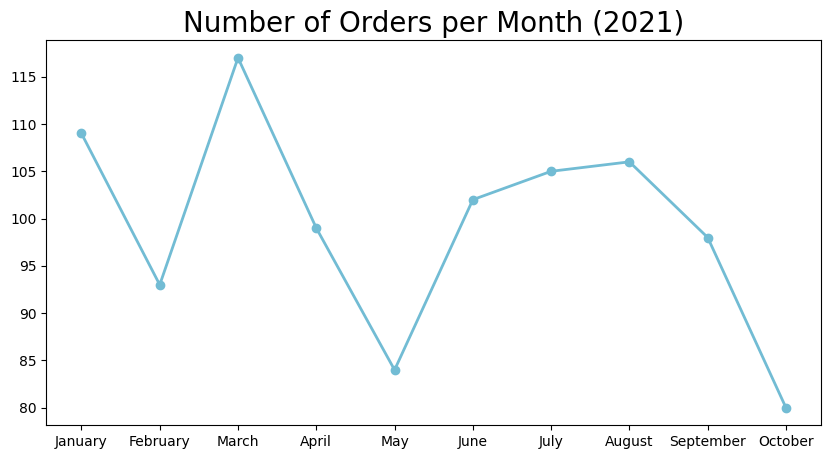

In [32]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi nama bulan

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order terbanyak terjadi pada bulan Maret. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan Februari, April, Mei, dan Oktober.

Tentunya penurunan tersebut akan berdampak pada total revenue yang diperoleh perusahaan

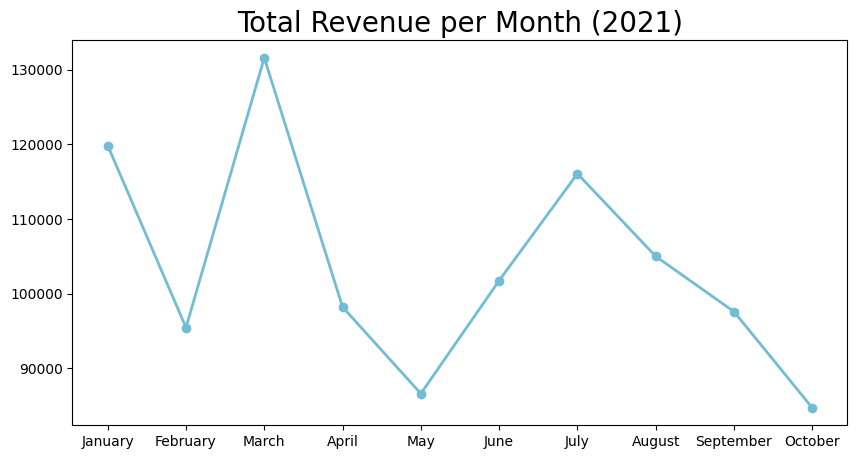

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Penurunan jumlah orderan yang sangat signifikan terjadi pada bulan Februari, April, Mei, dan Oktober berdampak terhadap penurunan revenue perusahaan. Normalnya, kita harus mencari tahu penyebab terjadinya penurunan tersebut dengan mempertimbangkan banyak hal, seperti keberadaan kompetitor, campaign, dll

### Pertanyaan 2: Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

<ipython-input-35-4e8fd51c088f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-35-4e8fd51c088f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])


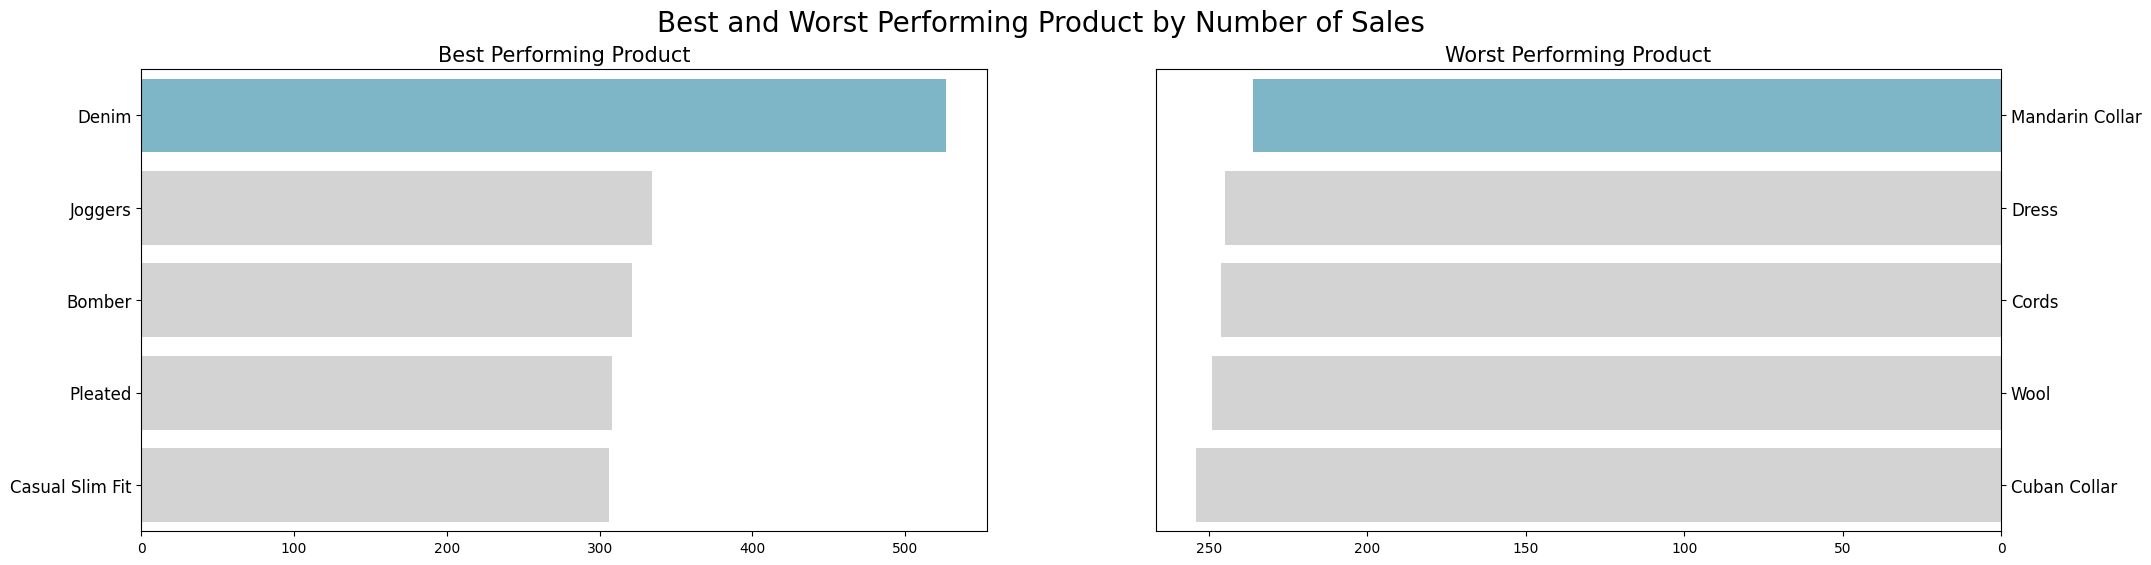

In [35]:
sum_order_items_df = all_df.groupby("product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

 # Best Performing Product
sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

 # Worst Performing Product
sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

Berdasarkan gambar di atas, Anda dapat melihat bahwa produk Denim merupakan produk yang paling laris. Kontras dengan hal tersebut, produk Mandarin Collar merupakan produk yang paling sedikit terjual

## Conclusion

- Conclution pertanyaan 1

Performa penjualan perusahaan dalam beberapa bulan terakhir menunjukkan fluktuasi yang signifikan. Jumlah order terbanyak terjadi pada bulan Maret, sedangkan penurunan yang signifikan terjadi pada bulan Februari, April, Mei, dan Oktober. Penurunan jumlah order ini berdampak langsung pada penurunan revenue perusahaan. Untuk memahami lebih lanjut penyebab penurunan ini, diperlukan analisis lebih mendalam terhadap faktor-faktor seperti keberadaan kompetitor, efektivitas campaign, dan faktor-faktor lain yang mungkin mempengaruhi penjualan.


- Conclution pertanyaan 2

Produk yang paling banyak terjual adalah produk Denim, sementara produk yang paling sedikit terjual adalah produk Mandarin Collar. Hal ini menunjukkan adanya preferensi konsumen yang lebih tinggi terhadap produk Denim dibandingkan dengan produk Mandarin Collar. Analis lebih lanjut mungkin diperlukan untuk memahami faktor-faktor yang mempengaruhi popularitas dan ketidakpopuleran masing-masing produk.